## Import

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Exploring data

### Read cleaned data from file

In [236]:
df = pd.read_csv('../data/processed/data.csv', index_col=0)
df.sample(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
7401,Movie,Mantra,Nicholas Kharkongor,"Rajat Kapoor, Lushin Dubey, Kalki Koechlin, Sh...",India,2017-12-15,2017,TV-14,89 min,"Dramas, Independent Movies, International Movies",2017,12
8524,Movie,The Surrounding Game,"Will Lockhart, Cole D. Pruitt",Unknown,United States,2018-08-30,2018,TV-14,98 min,Documentaries,2018,8
2099,TV Show,Trinkets,Unknown,"Brianna Hildebrand, Kiana Madeira, Quintessa S...",United States,2020-08-25,2020,TV-MA,2 Seasons,"TV Dramas, Teen TV Shows",2020,8
6689,Movie,Emo the Musical,Neil Triffett,"Benson Jack Anthony, Jordan Hare, Rahart Adams...",Australia,2018-02-01,2016,TV-MA,94 min,"Dramas, International Movies, Music & Musicals",2018,2
317,Movie,Pray Away,Kristine Stolakis,Unknown,United States,2021-08-03,2021,PG-13,102 min,"Documentaries, LGBTQ Movies",2021,8


### Data overview

**We want to know what is Netflix's main focus, is it movies or tv shows?**
  

First, we need to count the number of each type of content in the dataset and save it to a a dataframe `mf_ratio`

In [237]:
x=df['type'].value_counts()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

We then can use the `mf_ratio` dataframe to plot the distribution of movie and tv show on Netflix using a pie chart.

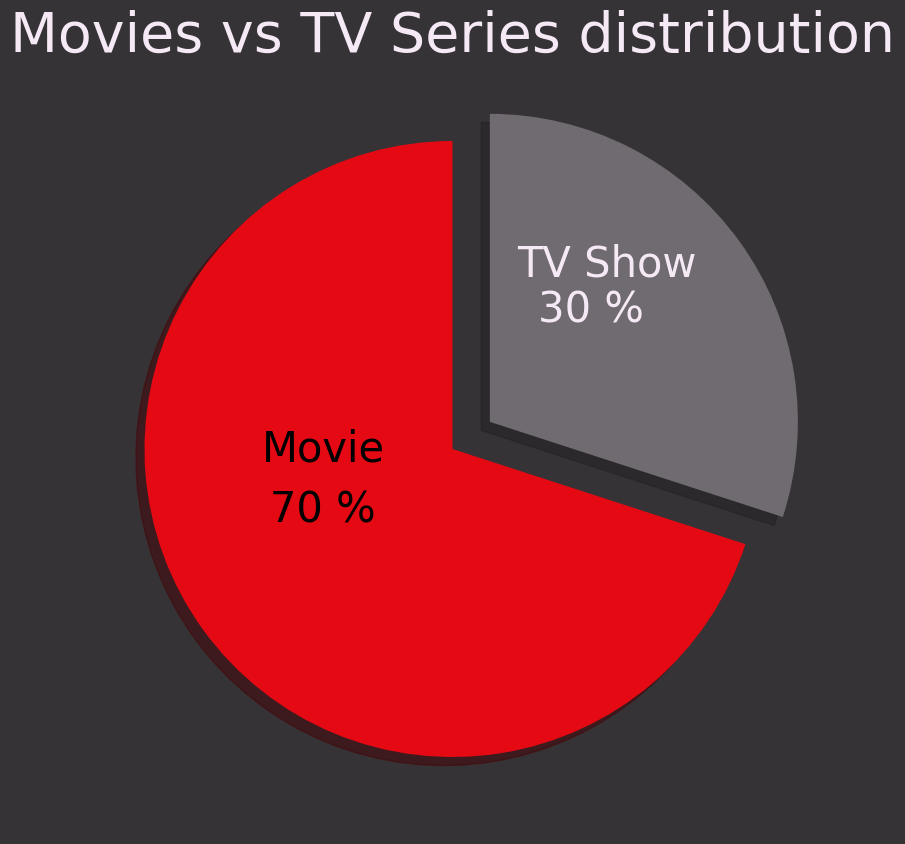

In [238]:
values = mf_ratio.values.flatten().tolist()
labels = mf_ratio.columns.tolist()
explode = (0, 0.15)
colors = ['#E50914', '#221f1f']  # Netflix red and dark color for the slices
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336")
plt.pie(x=values, shadow=True, explode=explode, colors =['#E50914','#706B70'], startangle=90)
plt.title('Movies vs TV Series distribution', color='#F5E9F5', fontsize=40)
ax.text(s=labels[0],x=-0.42,y=0,fontsize=30,va='center',ha='center')
ax.text(s=f'{values[0] * 100:.0f} %',x=-0.42,y=-0.2,fontsize=30,va='center',ha='center')

ax.text(s=labels[1],x=0.5,y=0.6, fontsize=30,color='#F5E9F5',va='center',ha='center')
ax.text(s=f'{values[1] * 100:.0f} %',x=0.45,y=0.45,fontsize=30,va='center',ha='center', color='#F5E9F5')
# Display the pie chart
plt.show()

2/3 of the content on Netflix is movies, while the rest is TV shows.

**How many tv shows/ movies are added to Netflix each year from 2000 to 2021.**

First, we have to create 2 dataframes, one for movies and one for tv shows. We then count the number of movies/tv shows added each year and save it to a new dataframe `movie_count` and `tv_series_count`.

In [239]:
movies = df[df['type'] == 'Movie']
tv_series = df[df['type'] == 'TV Show']

movies_count = movies['year_added'].value_counts().sort_index()
tv_series_count = tv_series['year_added'].value_counts().sort_index()

Now, we can visualize the growth of content over the years using a line chart.

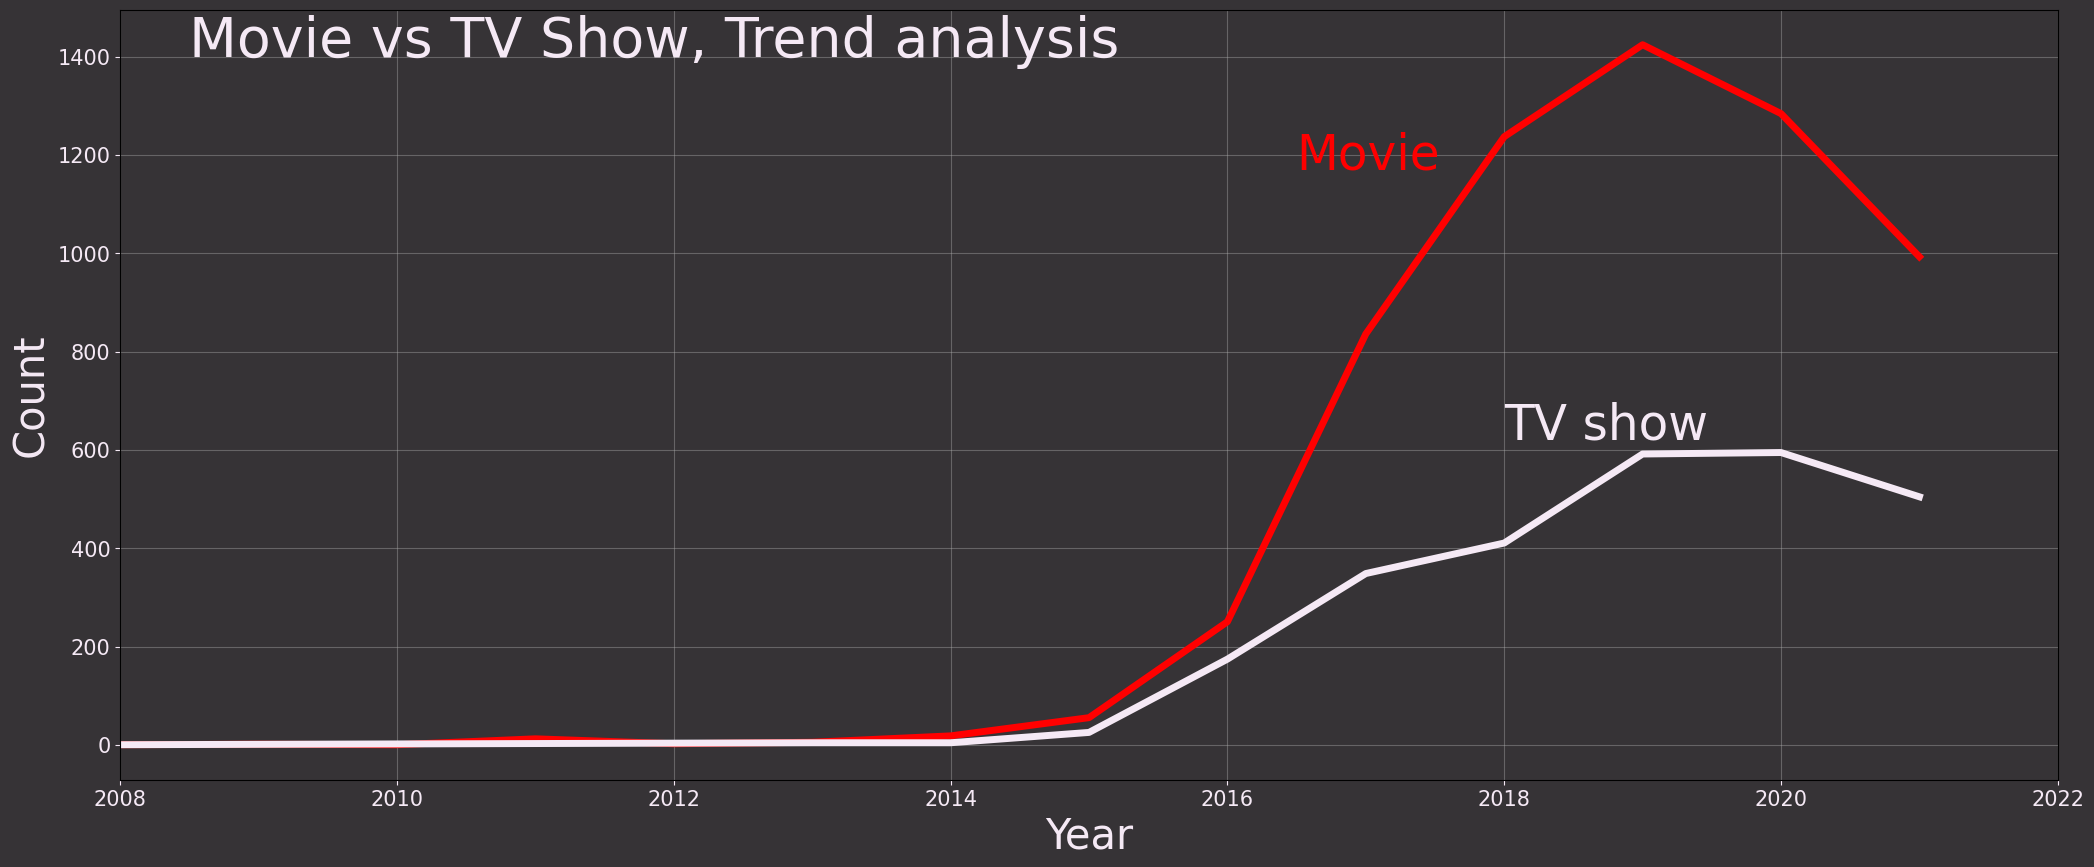

In [240]:
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.set_xticks(list(range(2008,2024,2)))
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlim(2008,2022)
sns.lineplot(x=movies_count.index, y=movies_count.values, color='red', ax=ax, linewidth=5)
sns.lineplot(x=tv_series_count.index, y=tv_series_count.values, color='#F5E9F5', ax=ax, linewidth=5)
ax.text(s="Movie vs TV Show, Trend analysis", x= 2008.5,y=1400,color='#F5E9F5',fontsize=40)
ax.text(s="Movie", x=2016.5, y= 1200,color='red', va="center",ha="left",fontsize=35)
ax.text(s="TV show", x=2018, y= 650,color='#F5E9F5', va="center",ha="left",fontsize=35)
ax.grid(True, alpha=0.4)
ax.set_xlabel('Year', fontsize=30, color='#F5E9F5')
ax.set_ylabel('Count', fontsize=30, color='#F5E9F5')
plt.show()


Netflix only started to add movies and tv shows to their platform in 2008. Both movies and tv shows have been growing steadily since then. However, the number of movies added to Netflix is much higher than the number of tv shows added. From 2019, the number of both movies and tv shows added to Netflix has been decreasing due to the pandemic.


**What month has the most content added?**

For this question, we will do on both movies and tv shows.

First, we need to create 2 dataframes, one for movies and one for tv shows and a dictionary to map the month number to the month name.

In [241]:
movies = df[df['type'] == 'Movie']['month_added']
tv_series = df[df['type'] == 'TV Show']['month_added']
month_name = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}


Next, we will visualize the number of movies/tv shows added each month using a bar chart.

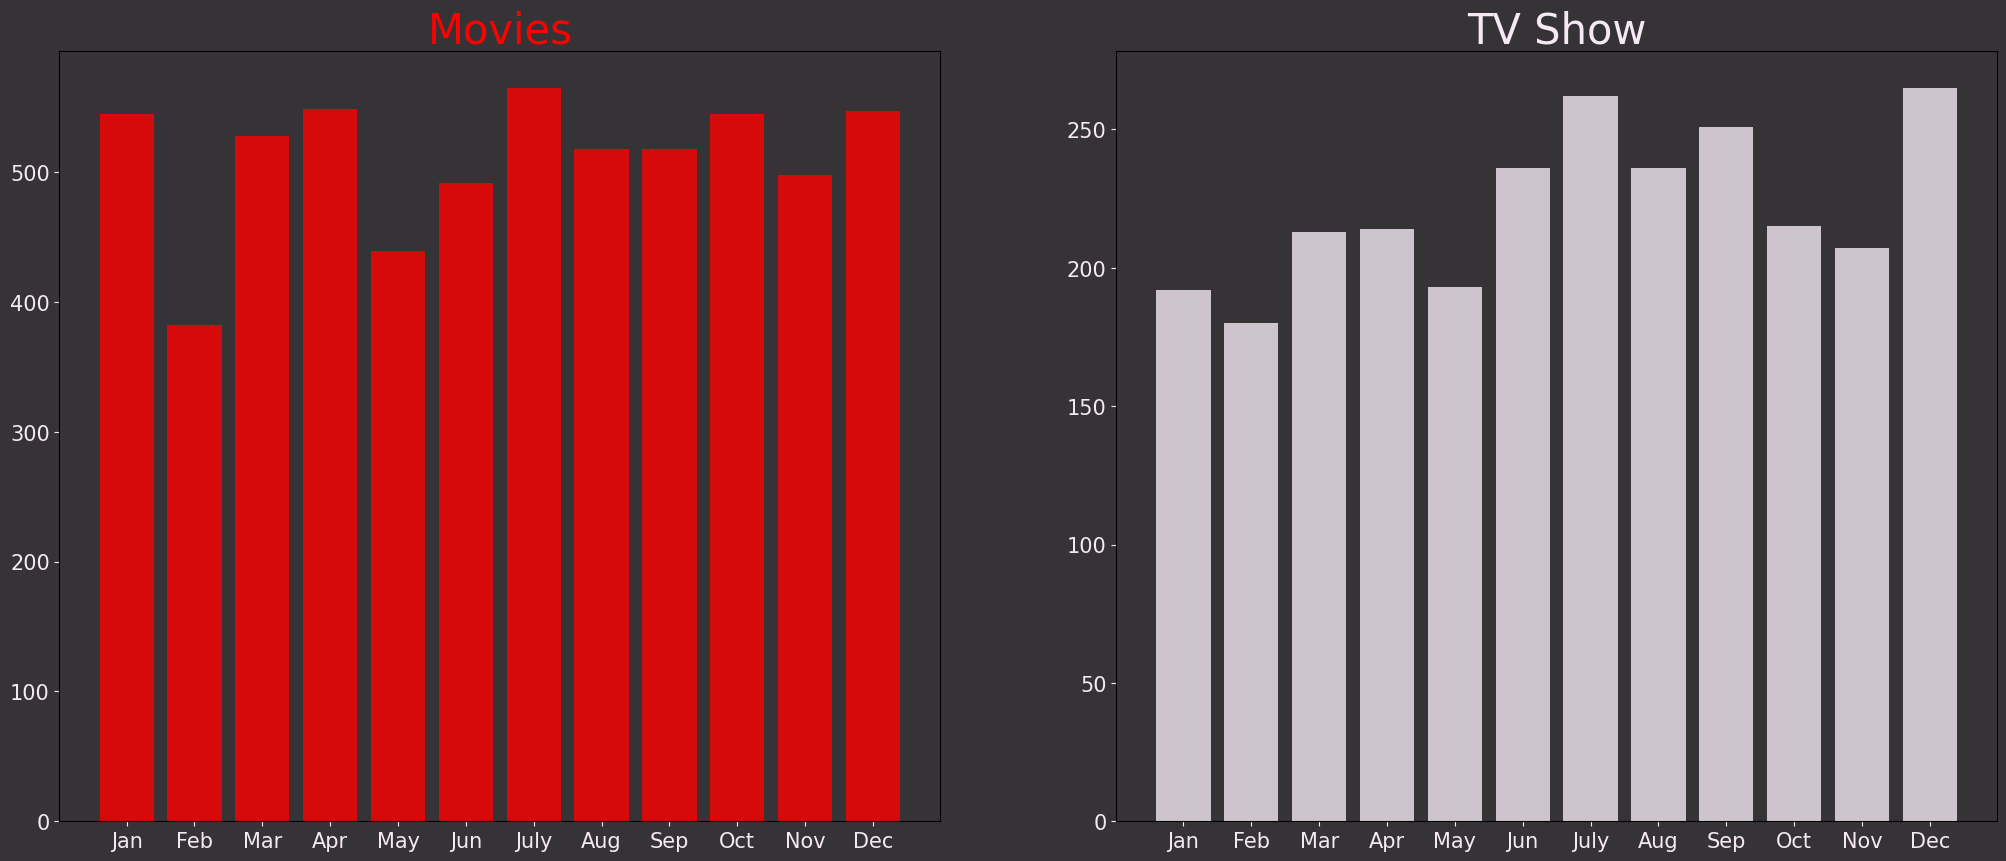

In [242]:
movies_count = movies.value_counts().sort_index()
tv_series_count = tv_series.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336", nrows = 1, ncols = 2)
ax[0].patch.set_facecolor('#363336')
ax[1].patch.set_facecolor('#363336')
ax[0].set_xticks(list(range(1,13)))
ax[1].set_xticks(list(range(1,13)))
ax[0].tick_params(axis='x', colors='#F5E9F5',labelsize=15)
ax[0].tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax[1].tick_params(axis='x', colors='#F5E9F5',labelsize=15)
ax[1].tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax[0].set_xticklabels(month_name.values())
ax[1].set_xticklabels(month_name.values())
ax[0].bar(movies_count.index, movies_count.values, color='red', alpha=0.8)
ax[1].bar(tv_series_count.index, tv_series_count.values, color='#F5E9F5', alpha=0.8)
ax[0].set_title('Movies', fontsize=30, color='red')
ax[1].set_title('TV Show', fontsize=30, color='#F5E9F5')
plt.show()

### Asking meaningful questions

### Question 1: How did Netflix react to the pandemic ?
Answering this question will help us understand Netflix's strategy during the pandemic. We will be looking at the main genre, the average duration, and the rating of the content added to Netflix in 2020 and 2021.

First, we need to filter out some useless genre such as "International Movies" and "International TV Shows" because they are not specific enough. 

In [243]:
df['listed_in'] = df['listed_in'].apply(lambda x: ', '.join([i for i in x.split(', ') if i not in ['International Movies', 'International TV Shows']]))
df['listed_in']

0                                Documentaries
1                      TV Dramas, TV Mysteries
2        Crime TV Shows, TV Action & Adventure
3                       Docuseries, Reality TV
4               Romantic TV Shows, TV Comedies
                         ...                  
8802            Cult Movies, Dramas, Thrillers
8803    Kids' TV, Korean TV Shows, TV Comedies
8804                   Comedies, Horror Movies
8805        Children & Family Movies, Comedies
8806                  Dramas, Music & Musicals
Name: listed_in, Length: 8790, dtype: object

Then, we filter out content that are only added to Netflix in 2020 and 2021 and save it to a new dataframe `pandemic_df`. For movies, we extract the minutes from the string, for tv shows, we extract the number of seasons from the string.

In [244]:
pandemic_df = df[df['year_added'].isin([2020, 2021])]
movies = pandemic_df[pandemic_df['type'] == 'Movie']
movies['duration'] = movies['duration'].apply(lambda x: int(x.split(' ')[0]))
tv_series = pandemic_df[pandemic_df['type'] == 'TV Show']
tv_series['duration'] = tv_series['duration'].apply(lambda x: int(x.split(' ')[0]))

Here, we define helper functions to help us analyze the data.

In [245]:
def genre_during_pandemic(df) -> pd.DataFrame:
    data = pd.DataFrame(index=[2020, 2021], columns=range(1,13))
    for i in range(2020, 2022):
        data_ = df[df['year_added'] == i]
        for j in range(1,13):
            try:
                data.loc[i,j] = data_[data_['month_added'] == j]['listed_in'].str.split(', ').explode().value_counts().index[0]
            except IndexError:
                data.loc[i,j] = None  
    return data

def ratings_during_pandemic(df) -> pd.DataFrame:
    data = pd.DataFrame(index=[2020, 2021], columns=range(1,13))
    for i in range(2020, 2022):
        data_ = df[df['year_added'] == i]
        for j in range(1,13):
            try:
                data.loc[i,j] = data_[data_['month_added'] == j]['rating'].value_counts().index[0]
            except IndexError:
                data.loc[i,j] = None  
    return data

def duration_during_pandemic_for_movie(df) -> pd.DataFrame:
    data = pd.DataFrame(index=[2020, 2021], columns=range(1,13))
    for i in range(2020, 2022):
        data_ = df[df['year_added'] == i]
        for j in range(1,13):
            try:
                data.loc[i,j] = round(data_[data_['month_added'] == j]['duration'].mean(), 2)
            except IndexError:
                data.loc[i,j] = None  
    return data

def duration_during_pandemic_for_tvshows(df) -> pd.DataFrame:
    data = pd.DataFrame(index=[2020, 2021], columns=range(1,13))
    for i in range(2020, 2022):
        data_ = df[df['year_added'] == i]
        for j in range(1,13):
            try:
                data.loc[i,j] = round(data_[data_['month_added'] == j]['duration'].mean(), 2)
            except IndexError:
                data.loc[i,j] = None  
    return data

In [246]:
movies_genre = genre_during_pandemic(movies)
movies_genre

,1,2,3,4,5,6,7,8,9,10,11,12
2020,Comedies,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas
2021,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,Dramas,None,None,None


In [247]:
movies_rating = ratings_during_pandemic(movies)
movies_rating

,1,2,3,4,5,6,7,8,9,10,11,12
2020,R,TV-MA,TV-MA,TV-14,TV-14,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA
2021,R,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,PG-13,None,None,None


In [248]:
movies_duration = duration_during_pandemic_for_movie(movies)
movies_duration

,1,2,3,4,5,6,7,8,9,10,11,12
2020,104.24,101.56,94.84,108.89,107.77,103.64,106.12,93.67,103.25,97.75,98.83,93.0
2021,103.91,102.97,101.25,105.07,98.11,99.68,100.18,108.45,105.69,NaN,NaN,NaN


**Insights**:
- The duration of the movies during the pandemic is around 105 minutes.
- Most of the genre is Drama.
- The most popular rating is TV-MA.
- Therefore, we can see that Netflix's main target was adults during the pandemic. Due to the fact that during the pandemic, people were forced to stay at home or work from home, so they had more free time. Knowing that, Netflix has shifted its focus to adults.

In [249]:
tv_series_genre = genre_during_pandemic(tv_series)
tv_series_genre

,1,2,3,4,5,6,7,8,9,10,11,12
2020,TV Dramas,TV Dramas,TV Dramas,TV Comedies,TV Dramas,TV Dramas,Reality TV,Kids' TV,TV Dramas,TV Dramas,TV Dramas,TV Dramas
2021,Docuseries,TV Dramas,Kids' TV,TV Dramas,TV Dramas,TV Dramas,TV Dramas,TV Dramas,Kids' TV,None,None,None


In [250]:
tv_series_rating = ratings_during_pandemic(tv_series)
tv_series_rating

,1,2,3,4,5,6,7,8,9,10,11,12
2020,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA
2021,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,None,None,None


In [251]:
tv_series_duration = duration_during_pandemic_for_tvshows(tv_series)
tv_series_duration

,1,2,3,4,5,6,7,8,9,10,11,12
2020,1.45,1.55,1.48,1.92,2.0,2.41,1.67,1.77,2.3,1.94,1.96,1.78
2021,2.0,1.86,1.7,1.55,1.71,1.81,2.51,1.8,2.2,NaN,NaN,NaN


**Insights**:
- The same as the movies, Netflix's main target was adults during the pandemic when the genre is Drama and the most popular rating is TV-MA.

### Question 2: Which directors primarily work within a certain rating category?

In [252]:
df['director'] = df['director'].str.split(', ')
df['cast'] = df['cast'].str.split(', ')
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('cast').explode('director').explode('listed_in')


In [253]:
collaborations = df.groupby(['director', 'cast', 'listed_in']).size()
collaborations


director      cast                 listed_in       
A. L. Vijay   G.V. Prakash Kumar   Comedies            1
                                   Dramas              1
              Hema                 Comedies            1
                                   Sci-Fi & Fantasy    1
              Joy Mathew           Comedies            1
                                                      ..
Şenol Sönmez  Yosi Mizrahi         Romantic Movies     1
              Zerrin Sümer         Comedies            1
                                   Dramas              1
              Özgür Emre Yıldırım  Comedies            1
                                   Romantic Movies     1
Length: 117744, dtype: int64